# 使用LSTM进行情感分析

### 深度学习在自然语言处理中的应用

自然语言处理是教会机器如何去处理或者读懂人类语言的系统，主要应用领域：

* 对话系统 - 聊天机器人（小冰）
* 情感分析 - 对一段文本进行情感识别（我们一会要做的）
* 图文映射 - CNN和RNN的融合
* 机器翻译 - 将一种语言翻译成另一种语言，现在谷歌做的太牛了
* 语音识别 - 能不能应用到游戏上，王者荣耀摁的手疼




### 词向量模型

计算机可只认识数字！


 
![caption](Images/SentimentAnalysis.png)

我们可以将一句话中的每一个词都转换成一个向量

![caption](Images/SentimentAnalysis2.png)

你可以将输入数据看成是一个 16*D 的一个矩阵。

词向量是具有空间意义的并不是简单的映射！例如，我们希望单词 “love” 和 “adore” 这两个词在向量空间中是有一定的相关性的，因为他们有类似的定义，他们都在类似的上下文中使用。单词的向量表示也被称之为词嵌入。

![caption](Images/SentimentAnalysis8.png)

# Word2Vec

为了去得到这些词嵌入，我们使用一个非常厉害的模型 “Word2Vec”。简单的说，这个模型根据上下文的语境来推断出每个词的词向量。如果两个个词在上下文的语境中，可以被互相替换，那么这两个词的距离就非常近。在自然语言中，上下文的语境对分析词语的意义是非常重要的。比如，之前我们提到的 “adore” 和 “love” 这两个词，我们观察如下上下文的语境。


![caption](Images/SentimentAnalysis9.png)

从句子中我们可以看到，这两个词通常在句子中是表现积极的，而且一般比名词或者名词组合要好。这也说明了，这两个词可以被互相替换，他们的意思是非常相近的。对于句子的语法结构分析，上下文语境也是非常重要的。所有，这个模型的作用就是从一大堆句子（以 Wikipedia 为例）中为每个独一无二的单词进行建模，并且输出一个唯一的向量。Word2Vec 模型的输出被称为一个嵌入矩阵。


![caption](Images/SentimentAnalysis3.png)

这个嵌入矩阵包含训练集中每个词的一个向量。传统来讲，这个嵌入矩阵中的词向量数据会很大。

Word2Vec 模型根据数据集中的每个句子进行训练，并且以一个固定窗口在句子上进行滑动，根据句子的上下文来预测固定窗口中间那个词的向量。然后根据一个损失函数和优化方法，来对这个模型进行训练。


# Recurrent Neural Networks (RNNs)

现在，我们已经得到了神经网络的输入数据 —— 词向量，接下来让我们看看需要构建的神经网络。NLP 数据的一个独特之处是它是时间序列数据。每个单词的出现都依赖于它的前一个单词和后一个单词。由于这种依赖的存在，我们使用循环神经网络来处理这种时间序列数据。

循环神经网络的结构和你之前看到的那些前馈神经网络的结构可能有一些不一样。前馈神经网络由三部分组成，输入层，隐藏层和输出层。

![caption](Images/SentimentAnalysis17.png)

前馈神经网络和 RNN 之前的主要区别就是 RNN 考虑了时间的信息。在 RNN 中，句子中的每个单词都被考虑上了时间步骤。实际上，时间步长的数量将等于最大序列长度。

![caption](Images/SentimentAnalysis18.png)

与每个时间步骤相关联的中间状态也被作为一个新的组件，称为隐藏状态向量 h(t) 。从抽象的角度来看，这个向量是用来封装和汇总前面时间步骤中所看到的所有信息。就像 x(t) 表示一个向量，它封装了一个特定单词的所有信息。

隐藏状态是当前单词向量和前一步的隐藏状态向量的函数。并且这两项之和需要通过激活函数来进行激活。

![caption](Images/SentimentAnalysis15.png)


![caption](Images/SentimentAnalysis16.png)

# Long Short Term Memory Units (LSTMs) 

长短期记忆网络单元，是另一个 RNN 中的模块。从抽象的角度看，LSTM 保存了文本中长期的依赖信息。正如我们前面所看到的，H 在传统的RNN网络中是非常简单的，这种简单结构不能有效的将历史信息链接在一起。举个例子，在问答领域中，假设我们得到如下一段文本，那么 LSTM 就可以很好的将历史信息进行记录学习。


![caption](Images/SentimentAnalysis4.png)

在这里，我们看到中间的句子对被问的问题没有影响。然而，第一句和第三句之间有很强的联系。对于一个典型的RNN网络，隐藏状态向量对于第二句的存储信息量可能比第一句的信息量会大很多。但是LSTM，基本上就会判断哪些信息是有用的，哪些是没用的，并且把有用的信息在 LSTM 中进行保存。

我们从更加技术的角度来谈谈 LSTM 单元，该单元根据输入数据 x(t) ，隐藏层输出 h(t) 。在这些单元中，h(t) 的表达形式比经典的 RNN 网络会复杂很多。这些复杂组件分为四个部分：输入门，输出门，遗忘门和一个记忆控制器。

![caption](Images/SentimentAnalysis10.png)

每个门都将 x(t) 和 h(t-1) 作为输入（没有在图中显示出来），并且利用这些输入来计算一些中间状态。每个中间状态都会被送入不同的管道，并且这些信息最终会汇集到 h(t) 。为简单起见，我们不会去关心每一个门的具体推导。这些门可以被认为是不同的模块，各有不同的功能。输入门决定在每个输入上施加多少强调，遗忘门决定我们将丢弃什么信息，输出门根据中间状态来决定最终的 h(t) 。


## 案例流程


    1) 制作词向量，可以使用gensim这个库，也可以直接用现成的
    2) 词和ID的映射，常规套路了
    3) 构建RNN网络架构
    4) 训练我们的模型
    5) 试试咋样

## 导入数据

首先，我们需要去创建词向量。为了简单起见，我们使用训练好的模型来创建。

作为该领域的一个最大玩家，Google 已经帮助我们在大规模数据集上训练出来了 Word2Vec 模型，包括 1000 亿个不同的词！在这个模型中，谷歌能创建 300 万个词向量，每个向量维度为 300。

在理想情况下，我们将使用这些向量来构建模型，但是因为这个单词向量矩阵相当大（3.6G），我们用另外一个现成的小一些的，该矩阵由 GloVe 进行训练得到。矩阵将包含 400000 个词向量，每个向量的维数为 50。

我们将导入两个不同的数据结构，一个是包含 400000 个单词的 Python 列表，一个是包含所有单词向量值得 400000*50 维的嵌入矩阵。


In [1]:
import numpy as np
wordsList = np.load('./training_data/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('./training_data/wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [2]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


我们也可以在词库中搜索单词，比如 “baseball”，然后可以通过访问嵌入矩阵来得到相应的向量，如下：

In [7]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.93270004,  1.04209995, -0.78514999,  0.91033   ,  0.22711   ,
       -0.62158   , -1.64929998,  0.07686   , -0.58679998,  0.058831  ,
        0.35628   ,  0.68915999, -0.50598001,  0.70472997,  1.26639998,
       -0.40031001, -0.020687  ,  0.80862999, -0.90565997, -0.074054  ,
       -0.87674999, -0.62910002, -0.12684999,  0.11524   , -0.55685002,
       -1.68260002, -0.26291001,  0.22632   ,  0.713     , -1.08280003,
        2.12310004,  0.49869001,  0.066711  , -0.48225999, -0.17896999,
        0.47699001,  0.16384   ,  0.16537   , -0.11506   , -0.15962   ,
       -0.94926   , -0.42833   , -0.59456998,  1.35660005, -0.27506   ,
        0.19918001, -0.36008   ,  0.55667001, -0.70314997,  0.17157   ], dtype=float32)

现在我们有了向量，我们的第一步就是输入一个句子，然后构造它的向量表示。假设我们现在的输入句子是 “I thought the movie was incredible and inspiring”。为了得到词向量，我们可以使用 TensorFlow 的嵌入函数。这个函数有两个参数，一个是嵌入矩阵（在我们的情况下是词向量矩阵），另一个是每个词对应的索引。


In [8]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

/Users/xupei/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


数据管道如下图所示：

![caption](Images/SentimentAnalysis5.png)

输出数据是一个 10*50 的词矩阵，其中包括 10 个词，每个词的向量维度是 50。就是去找到这些词对应的向量

In [9]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


在整个训练集上面构造索引之前，我们先花一些时间来可视化我们所拥有的数据类型。这将帮助我们去决定如何设置最大序列长度的最佳值。在前面的例子中，我们设置了最大长度为 10，但这个值在很大程度上取决于你输入的数据。

训练集我们使用的是 IMDB 数据集。这个数据集包含 25000 条电影数据，其中 12500 条正向数据，12500 条负向数据。这些数据都是存储在一个文本文件中，首先我们需要做的就是去解析这个文件。正向数据包含在一个文件中，负向数据包含在另一个文件中。


In [10]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['./training_data/positiveReviews/' + f for f in listdir('./training_data/positiveReviews/') if isfile(join('./training_data/positiveReviews/', f))]
negativeFiles = ['./training_data/negativeReviews/' + f for f in listdir('./training_data/negativeReviews/') if isfile(join('./training_data/negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
The total number of files is 25000
The total number of words in the files is 5844680
The average number of words in the files is 233.7872


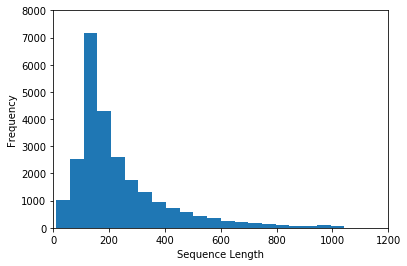

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

从直方图和句子的平均单词数，我们认为将句子最大长度设置为 250 是可行的。

In [32]:
maxSeqLength = 250

接下来，让我们看看如何将单个文件中的文本转换成索引矩阵，比如下面的代码就是文本中的其中一个评论。

In [33]:
fname = positiveFiles[3] #Can use any valid index (not just 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

It's a strange feeling to sit alone in a theater occupied by parents and their rollicking kids. I felt like instead of a movie ticket, I should have been given a NAMBLA membership.<br /><br />Based upon Thomas Rockwell's respected Book, How To Eat Fried Worms starts like any children's story: moving to a new town. The new kid, fifth grader Billy Forrester was once popular, but has to start anew. Making friends is never easy, especially when the only prospect is Poindexter Adam. Or Erica, who at 4 1/2 feet, is a giant.<br /><br />Further complicating things is Joe the bully. His freckled face and sleeveless shirts are daunting. He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it. But not immediately. No, the death ring unleashes a poison that kills you in the eight grade.<br /><br />Joe and his axis of evil welcome Billy by smuggling a handful of slimy worms into his thermos. Once discovered, Billy plays it cool, swearing tha

接下来，我们将它转换成一个索引矩阵。

In [34]:
# 删除标点符号、括号、问号等，只留下字母数字字符
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [43]:
with open(fname) as f:
    indexCounter = 0
    line = f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        wordsList.index(word)

ValueError: 'rockwells' is not in list

In [40]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
#print(firstFile)
#print(fname)
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        try:
            firstFile[indexCounter] = wordsList.index(word)
        except ValueError:
            firstFile[indexCounter] = 399999 #Vector for unknown words
        indexCounter = indexCounter + 1
firstFile

IndexError: index 250 is out of bounds for axis 0 with size 250

现在，我们用相同的方法来处理全部的 25000 条评论。我们将导入电影训练集，并且得到一个 25000 * 250 的矩阵。这是一个计算成本非常高的过程，可以直接使用理好的索引矩阵文件。

In [13]:
# ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
# fileCounter = 0
# for pf in positiveFiles:
#    with open(pf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 

# for nf in negativeFiles:
#    with open(nf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 
# #Pass into embedding function and see if it evaluates. 

# np.save('idsMatrix', ids)

In [14]:
ids = np.load('./training_data/idsMatrix.npy')

## 辅助函数

In [15]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

# RNN Model

现在，我们可以开始构建我们的 TensorFlow 图模型。首先，我们需要去定义一些超参数，比如批处理大小，LSTM的单元个数，分类类别和训练次数。

In [27]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 50000

与大多数 TensorFlow 图一样，现在我们需要指定两个占位符，一个用于数据输入，另一个用于标签数据。对于占位符，最重要的一点就是确定好维度。

标签占位符代表一组值，每一个值都为 [1,0] 或者 [0,1]，这个取决于数据是正向的还是负向的。输入占位符，是一个整数化的索引数组。


![caption](Images/SentimentAnalysis12.png)

In [28]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

一旦，我们设置了我们的输入数据占位符，我们可以调用
tf.nn.embedding_lookup() 函数来得到我们的词向量。该函数最后将返回一个三维向量，第一个维度是批处理大小，第二个维度是句子长度，第三个维度是词向量长度。更清晰的表达，如下图所示：

![caption](Images/SentimentAnalysis13.png)

In [29]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

现在我们已经得到了我们想要的数据形式，那么揭晓了我们看看如何才能将这种数据形式输入到我们的 LSTM 网络中。首先，我们使用 tf.nn.rnn_cell.BasicLSTMCell 函数，这个函数输入的参数是一个整数，表示需要几个 LSTM 单元。这是我们设置的一个超参数，我们需要对这个数值进行调试从而来找到最优的解。然后，我们会设置一个 dropout 参数，以此来避免一些过拟合。

最后，我们将 LSTM cell 和三维的数据输入到 tf.nn.dynamic_rnn ，这个函数的功能是展开整个网络，并且构建一整个 RNN 模型。



In [30]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

堆栈 LSTM 网络是一个比较好的网络架构。也就是前一个LSTM 隐藏层的输出是下一个LSTM的输入。堆栈LSTM可以帮助模型记住更多的上下文信息，但是带来的弊端是训练参数会增加很多，模型的训练时间会很长，过拟合的几率也会增加。

dynamic RNN 函数的第一个输出可以被认为是最后的隐藏状态向量。这个向量将被重新确定维度，然后乘以最后的权重矩阵和一个偏置项来获得最终的输出值。



In [31]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
#取最终的结果值
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

接下来，我们需要定义正确的预测函数和正确率评估参数。正确的预测形式是查看最后输出的0-1向量是否和标记的0-1向量相同。

In [32]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

之后，我们使用一个标准的交叉熵损失函数来作为损失值。对于优化器，我们选择 Adam，并且采用默认的学习率。

In [33]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

# 超参数调整

选择合适的超参数来训练你的神经网络是至关重要的。你会发现你的训练损失值与你选择的优化器（Adam，Adadelta，SGD，等等），学习率和网络架构都有很大的关系。特别是在RNN和LSTM中，单元数量和词向量的大小都是重要因素。

* 学习率：RNN最难的一点就是它的训练非常困难，因为时间步骤很长。那么，学习率就变得非常重要了。如果我们将学习率设置的很大，那么学习曲线就会波动性很大，如果我们将学习率设置的很小，那么训练过程就会非常缓慢。根据经验，将学习率默认设置为 0.001 是一个比较好的开始。如果训练的非常缓慢，那么你可以适当的增大这个值，如果训练过程非常的不稳定，那么你可以适当的减小这个值。


* 优化器：这个在研究中没有一个一致的选择，但是 Adam 优化器被广泛的使用。
* LSTM单元的数量：这个值很大程度上取决于输入文本的平均长度。而更多的单元数量可以帮助模型存储更多的文本信息，当然模型的训练时间就会增加很多，并且计算成本会非常昂贵。
* 词向量维度：词向量的维度一般我们设置为50到300。维度越多意味着可以存储更多的单词信息，但是你需要付出的是更昂贵的计算成本。

# 训练

训练过程的基本思路是，我们首先先定义一个 TensorFlow 会话。然后，我们加载一批评论和对应的标签。接下来，我们调用会话的 run 函数。这个函数有两个参数，第一个参数被称为 fetches 参数，这个参数定义了我们感兴趣的值。我们希望通过我们的优化器来最小化损失函数。第二个参数被称为 feed_dict 参数。这个数据结构就是我们提供给我们的占位符。我们需要将一个批处理的评论和标签输入模型，然后不断对这一组训练数据进行循环训练。



In [36]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels}) 
    
    if (i % 1000 == 0 and i != 0):
        loss_ = sess.run(loss, {input_data: nextBatch, labels: nextBatchLabels})
        accuracy_ = sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})
        
        print("iteration {}/{}...".format(i+1, iterations),
              "loss {}...".format(loss_),
              "accuracy {}...".format(accuracy_))    
    #Save the network every 10,000 training iterations
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)

iteration 1001/50000... loss 0.6308178901672363... accuracy 0.5...
iteration 2001/50000... loss 0.7168402671813965... accuracy 0.625...
iteration 3001/50000... loss 0.7420873641967773... accuracy 0.5...
iteration 4001/50000... loss 0.650059700012207... accuracy 0.5416666865348816...
iteration 5001/50000... loss 0.6791467070579529... accuracy 0.5...
iteration 6001/50000... loss 0.6914048790931702... accuracy 0.5416666865348816...
iteration 7001/50000... loss 0.36072710156440735... accuracy 0.8333333134651184...
iteration 8001/50000... loss 0.5486791729927063... accuracy 0.75...
iteration 9001/50000... loss 0.41976991295814514... accuracy 0.7916666865348816...
iteration 10001/50000... loss 0.10224487632513046... accuracy 1.0...
saved to models/pretrained_lstm.ckpt-10000
iteration 11001/50000... loss 0.37682783603668213... accuracy 0.8333333134651184...
iteration 12001/50000... loss 0.266050785779953... accuracy 0.9166666865348816...
iteration 13001/50000... loss 0.40790924429893494... ac

![caption](Images/SentimentAnalysis6.png)
![caption](Images/SentimentAnalysis7.png)

查看上面的训练曲线，我们发现这个模型的训练结果还是不错的。损失值在稳定的下降，正确率也不断的在接近 100% 。然而，当分析训练曲线的时候，我们应该注意到我们的模型可能在训练集上面已经过拟合了。过拟合是机器学习中一个非常常见的问题，表示模型在训练集上面拟合的太好了，但是在测试集上面的泛化能力就会差很多。也就是说，如果你在训练集上面取得了损失值是 0 的模型，但是这个结果也不一定是最好的结果。当我们训练 LSTM 的时候，提前终止是一种常见的防止过拟合的方法。基本思路是，我们在训练集上面进行模型训练，同事不断的在测试集上面测量它的性能。一旦测试误差停止下降了，或者误差开始增大了，那么我们就需要停止训练了。因为这个迹象表明，我们网络的性能开始退化了。

导入一个预训练的模型需要使用 TensorFlow 的另一个会话函数，称为 Server ，然后利用这个会话函数来调用 restore 函数。这个函数包括两个参数，一个表示当前的会话，另一个表示保存的模型。


In [37]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models\pretrained_lstm.ckpt-40000


然后，从我们的测试集中导入一些电影评论。请注意，这些评论是模型从来没有看见过的。

In [38]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Accuracy for this batch: 91.6666686535
Accuracy for this batch: 79.1666686535
Accuracy for this batch: 87.5
Accuracy for this batch: 87.5
Accuracy for this batch: 91.6666686535
Accuracy for this batch: 75.0
Accuracy for this batch: 91.6666686535
Accuracy for this batch: 70.8333313465
Accuracy for this batch: 83.3333313465
Accuracy for this batch: 95.8333313465
